___
## Exercício 1
___

#### Obs: Por algum motivo o Dataset que baixei não veio completo com o Brasil

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv('../../Datasets/daily-covid-cases-deaths.csv')

In [2]:
df_original.Entity.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Asia excl. China', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados'], dtype=object)

### A

In [3]:
df = df_original.query('Entity == "Barbados"')

df.Day = pd.to_datetime(df.Day)
print(f'Primeiro registro: {df.Day.min()}\nÚltimo registro: {df.Day.max()}')
print(df.Day.max() - df.Day.min())

Primeiro registro: 2020-03-17 00:00:00
Último registro: 2021-08-09 00:00:00
510 days 00:00:00


### B

Text(0.5, 1.0, 'Mortes por mês e ano em Barbados')

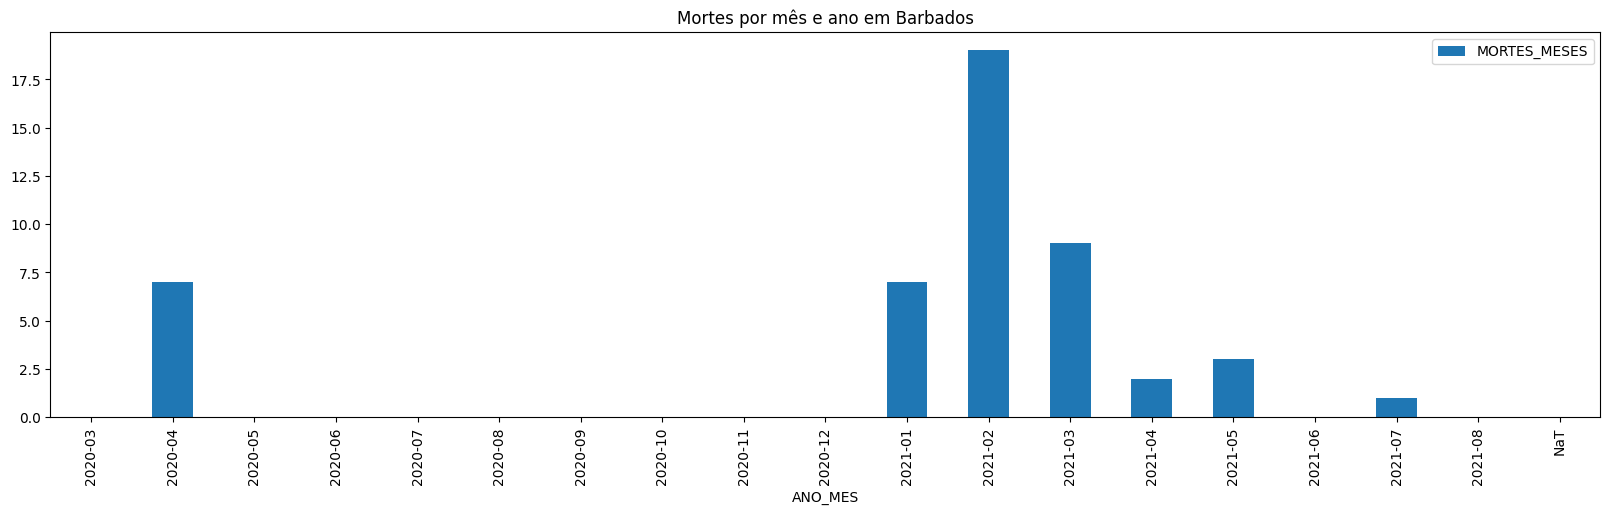

In [4]:
import matplotlib.pyplot as plt

df["ANO_MES"] = df.Day.dt.to_period("M")
df["MORTES_MESES"] = df.groupby("ANO_MES")["Daily new confirmed deaths due to COVID-19"].transform("sum")
df_plot = df[["ANO_MES", "MORTES_MESES"]].drop_duplicates()
df_plot_index = df_plot.set_index("ANO_MES")
df_plot_index.plot(kind="bar", figsize=(20, 5))
plt.title("Mortes por mês e ano em Barbados")


## C

Text(0.5, 1.0, 'Mortes por mês e ano em Barbados em 2021')

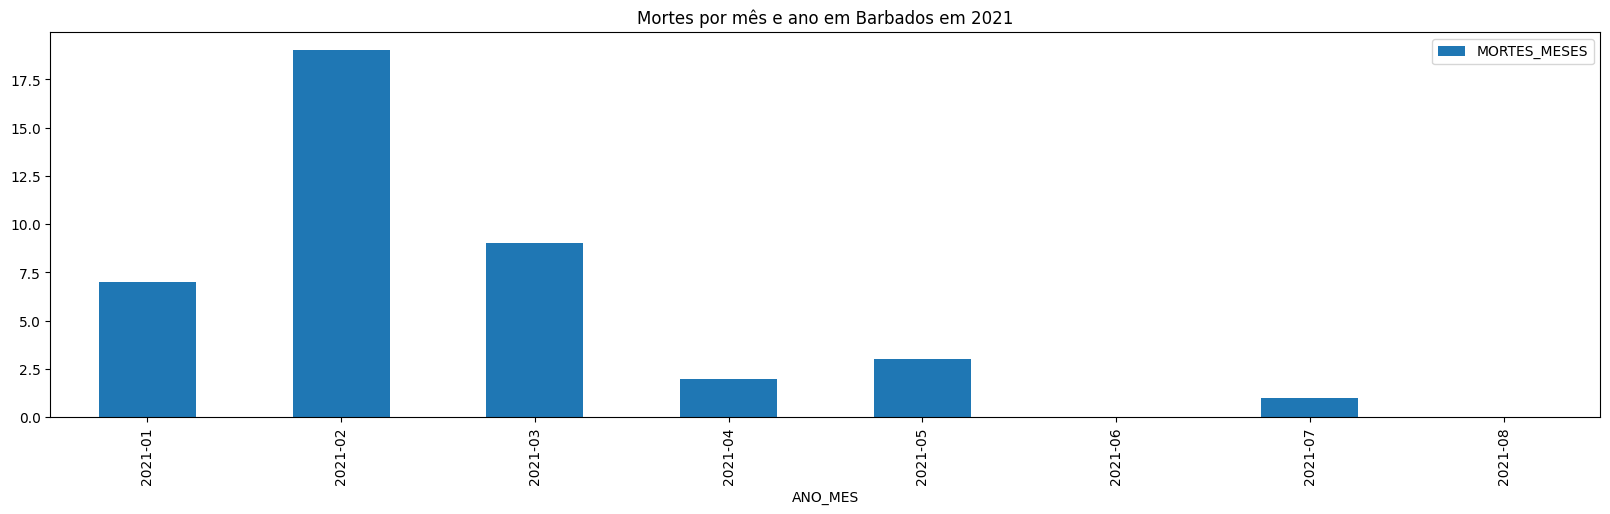

In [5]:
df_2021 = df_plot[df_plot['ANO_MES'] >= '2021-01']
df_2021_index = df_2021.set_index("ANO_MES")
df_2021_index.plot(kind="bar", figsize=(20, 5))
plt.title("Mortes por mês e ano em Barbados em 2021")

## D

In [6]:
df_original.Day = pd.to_datetime(df_original.Day)
df_original["ANO_MES"] = df_original.Day.dt.to_period("M")
df_original['MORTES_TOTAL'] = df_original.groupby('Entity')['Daily new confirmed deaths due to COVID-19'].transform('sum')

df_mortes_total = df_original[['Entity', 'ANO_MES', 'MORTES_TOTAL']].sort_values('MORTES_TOTAL', ascending=False)
df_mortes_total = df_mortes_total.drop_duplicates('Entity', keep='last')
df_mortes_total

,Entity,ANO_MES,MORTES_TOTAL
9688,Asia,2020-04,1442834.0
11412,Asia excl. China,2022-07,1438910.0
1766,Africa,2022-07,255759.0
7856,Argentina,2022-07,129278.0
16702,Bangladesh,2022-07,29275.0
13222,Austria,2022-07,20231.0
11451,Australia,2020-02,11038.0
13350,Azerbaijan,2020-06,9739.0
8026,Armenia,2020-08,8635.0
25,Afghanistan,2020-03,7742.0


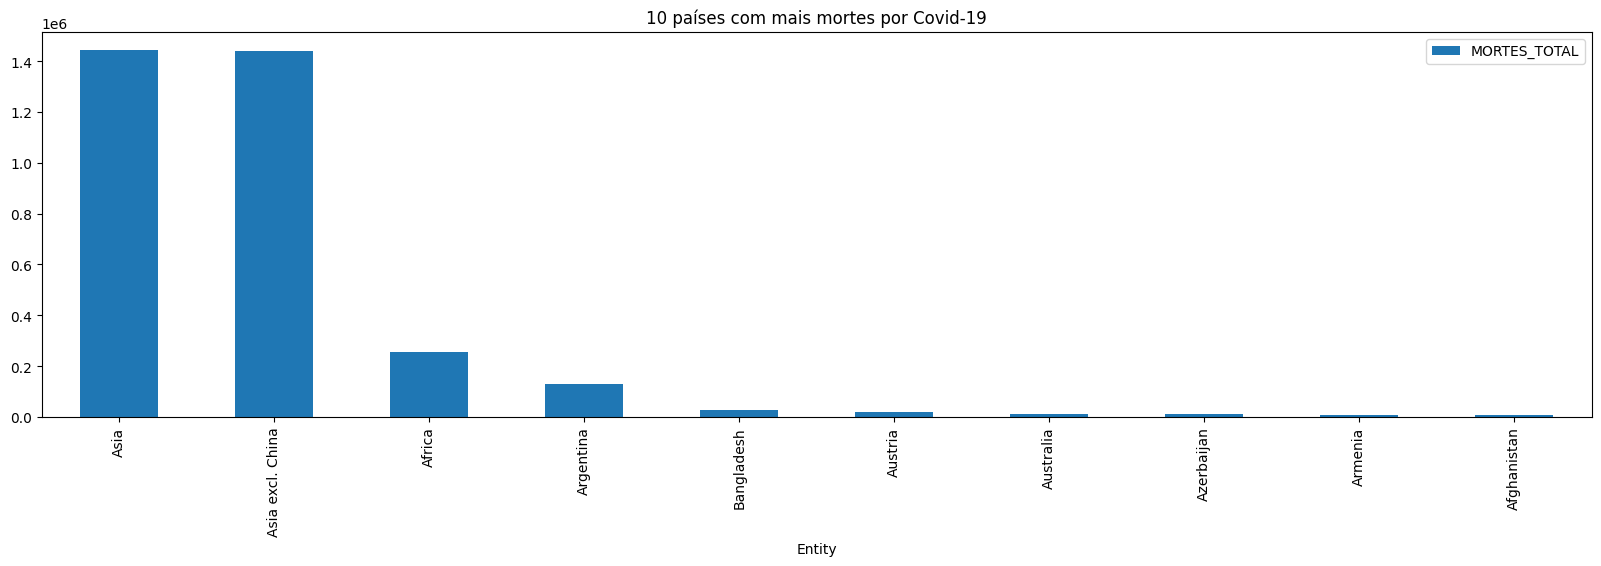

In [7]:
df_mortes_total_10 = df_mortes_total.head(10)
df_mortes_total_10_index = df_mortes_total_10.set_index('Entity')
df_mortes_total_10_index.plot(kind='bar', figsize=(20, 5))
plt.title('10 países com mais mortes por Covid-19')
plt.show()

## D

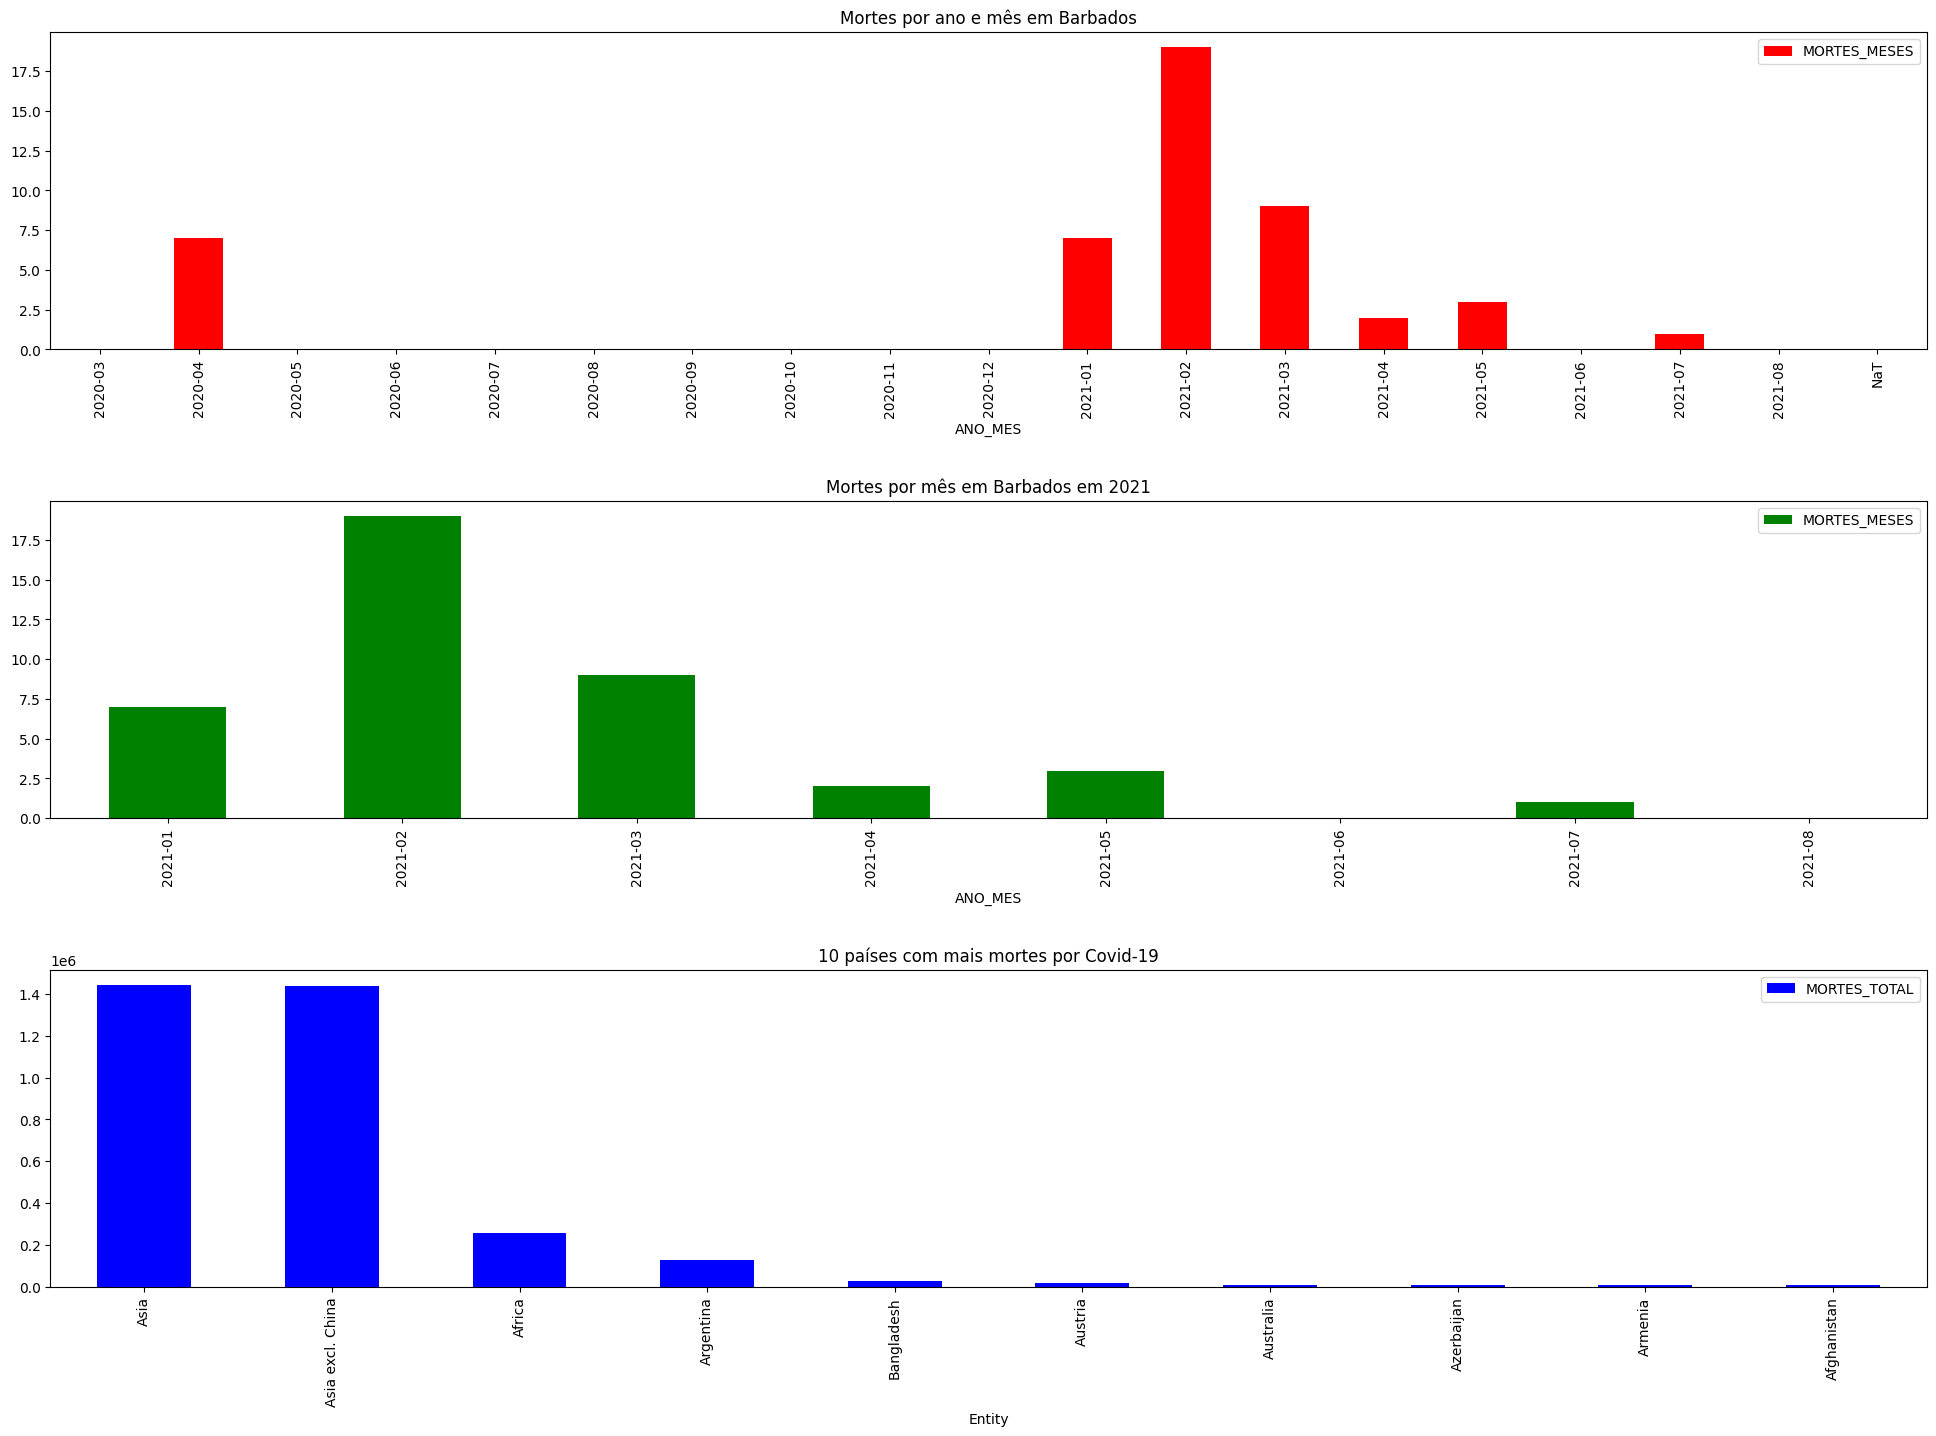

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
df_plot_index.plot(kind="bar", ax=ax[0], color='red', title="Mortes por ano e mês em Barbados")
df_2021_index.plot(kind="bar", ax=ax[1], color='green', title="Mortes por mês em Barbados em 2021")
df_mortes_total_10_index.plot(kind='bar', ax=ax[2], color='blue', title='10 países com mais mortes por Covid-19')

plt.tight_layout(pad=3.0) 
plt.show()

___
## Exercício 2
___

In [9]:
df2 = pd.read_csv('../../Datasets/producao_grega.csv', sep=';')
df2

,dia,peça,Medicao,Temperatura,Colaborador,Defeito?,Nome defeito
0,3,peca1,14.358837,21.104388,Homero,0,-
1,7,peca2,8.858221,27.856616,Hesiodo,0,-
2,5,peca2,9.026443,27.061502,Sofocles,0,-
3,6,peca2,9.086339,26.204846,Sofocles,0,-
4,1,peca2,11.067584,18.930704,Homero,1,d1
...,...,...,...,...,...,...,...
3495,3,peca1,14.313940,24.249850,Sófocles,0,-
3496,4,peca2,9.255773,24.719838,Homero,0,-
3497,2,peca1,13.890427,20.497279,Hesiodo,1,d4
3498,5,peca2,8.958238,26.802352,Hesiodo,0,-


In [10]:
print(f'Peças amostradas por colaborador\n{df2.groupby("Colaborador").size()}')

Peças amostradas por colaborador
Colaborador
Hesiodo     851
Homero      891
Sofocles    864
Sófocles    894
dtype: int64


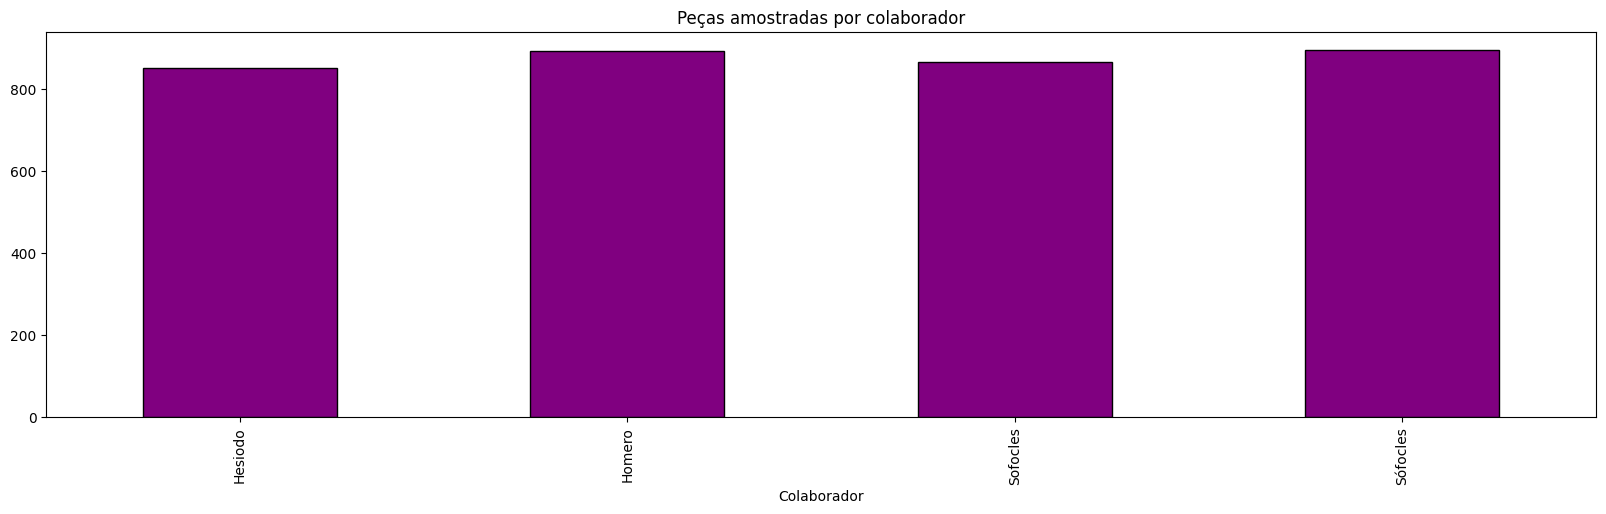

In [11]:
df2.groupby('Colaborador').size().plot(kind='bar', figsize=(20, 5), color='purple', edgecolor='black')
plt.title('Peças amostradas por colaborador')
plt.show()

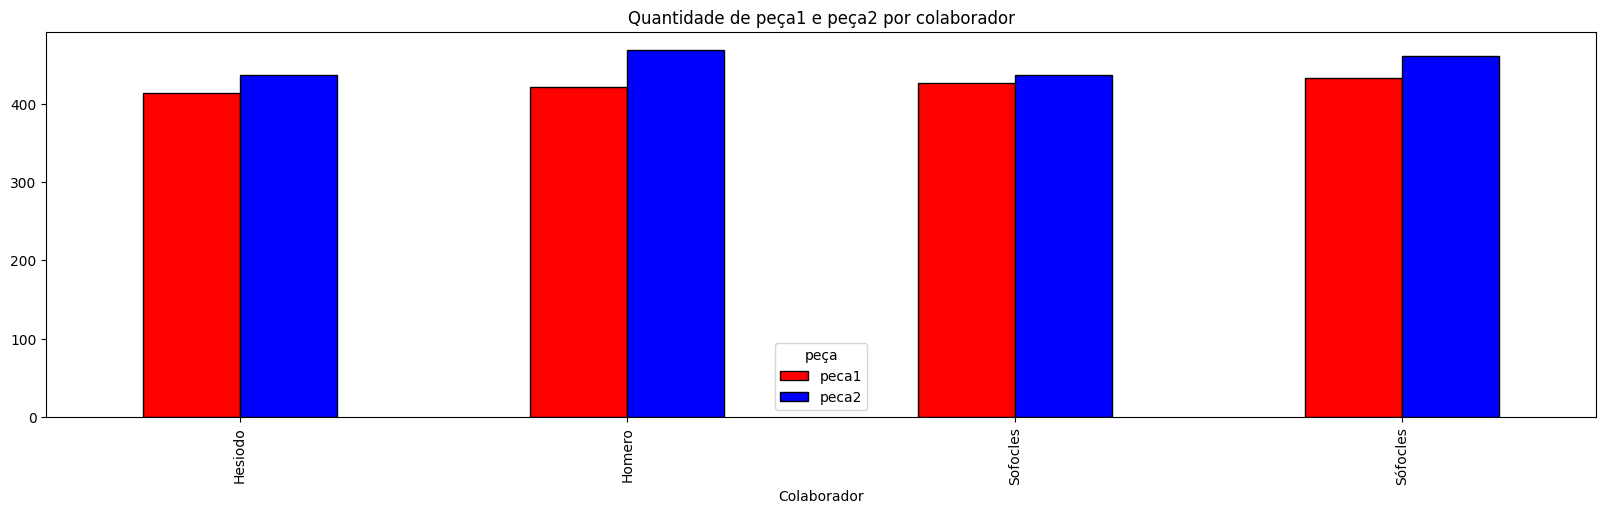

In [12]:
# quero saber a quantidade de peça1 e peça2 por colaborador na coluna peça
df2.groupby(['Colaborador', 'peça']).size()

# agora plote um gráfico de barras com a quantidade de peça1 e peça2 por colaborador, quero inserir bordas e mudar a cor
df2.groupby(['Colaborador', 'peça']).size().unstack().plot(kind='bar', figsize=(20, 5), edgecolor='black', color=['red', 'blue'])
plt.title('Quantidade de peça1 e peça2 por colaborador')
plt.show()



In [13]:
df2.groupby('peça').size()

peça
peca1    1696
peca2    1804
dtype: int64

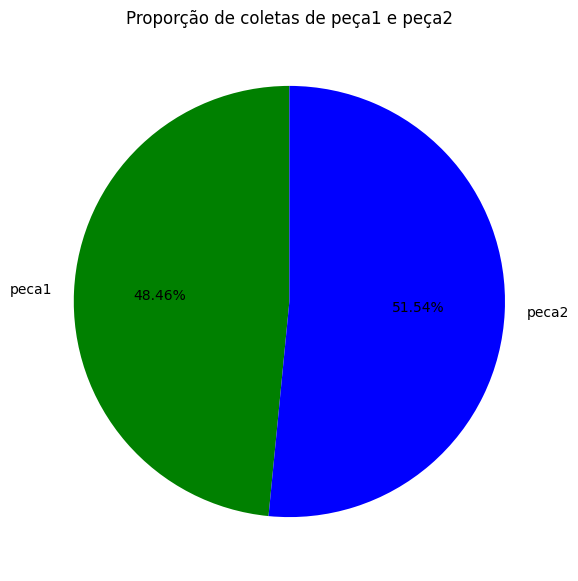

In [14]:
df2.groupby('peça').size().plot(kind='pie', autopct='%1.2f%%', startangle=90, figsize=(7, 7), colors=['green', 'blue'])
plt.title('Proporção de coletas de peça1 e peça2')
plt.show()

In [15]:
df2

,dia,peça,Medicao,Temperatura,Colaborador,Defeito?,Nome defeito
0,3,peca1,14.358837,21.104388,Homero,0,-
1,7,peca2,8.858221,27.856616,Hesiodo,0,-
2,5,peca2,9.026443,27.061502,Sofocles,0,-
3,6,peca2,9.086339,26.204846,Sofocles,0,-
4,1,peca2,11.067584,18.930704,Homero,1,d1
...,...,...,...,...,...,...,...
3495,3,peca1,14.313940,24.249850,Sófocles,0,-
3496,4,peca2,9.255773,24.719838,Homero,0,-
3497,2,peca1,13.890427,20.497279,Hesiodo,1,d4
3498,5,peca2,8.958238,26.802352,Hesiodo,0,-


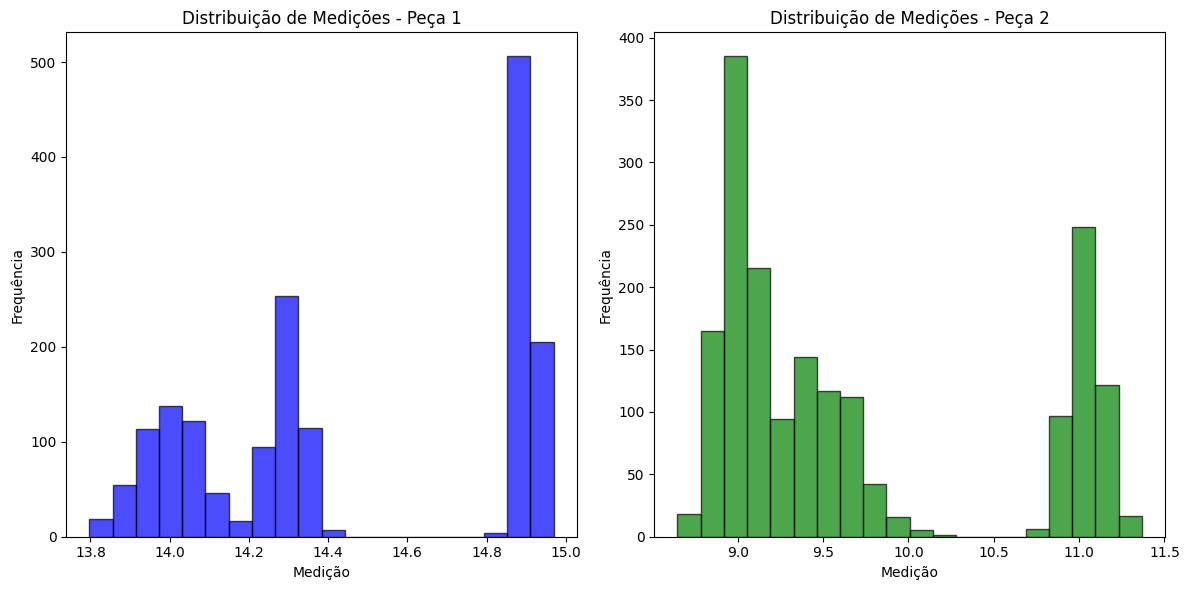

In [16]:
peca1 = df2[df2["peça"] == "peca1"]["Medicao"]
peca2 = df2[df2["peça"] == "peca2"]["Medicao"]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(peca1, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribuição de Medições - Peça 1")
plt.xlabel("Medição")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
plt.hist(peca2, bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title("Distribuição de Medições - Peça 2")
plt.xlabel("Medição")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


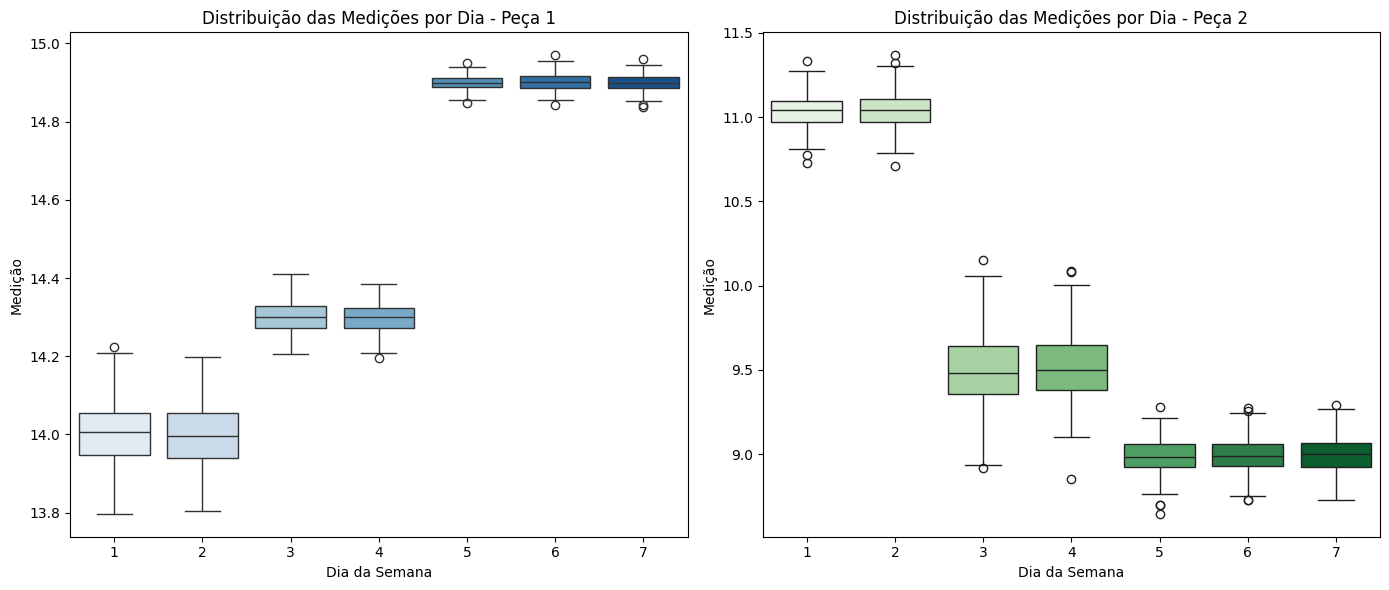

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="dia", y="Medicao", data=df2[df2["peça"] == "peca1"], palette="Blues")
plt.title("Distribuição das Medições por Dia - Peça 1")
plt.xlabel("Dia da Semana")
plt.ylabel("Medição")

plt.subplot(1, 2, 2)
sns.boxplot(x="dia", y="Medicao", data=df2[df2["peça"] == "peca2"], palette="Greens")
plt.title("Distribuição das Medições por Dia - Peça 2")
plt.xlabel("Dia da Semana")
plt.ylabel("Medição")

plt.tight_layout()
plt.show()

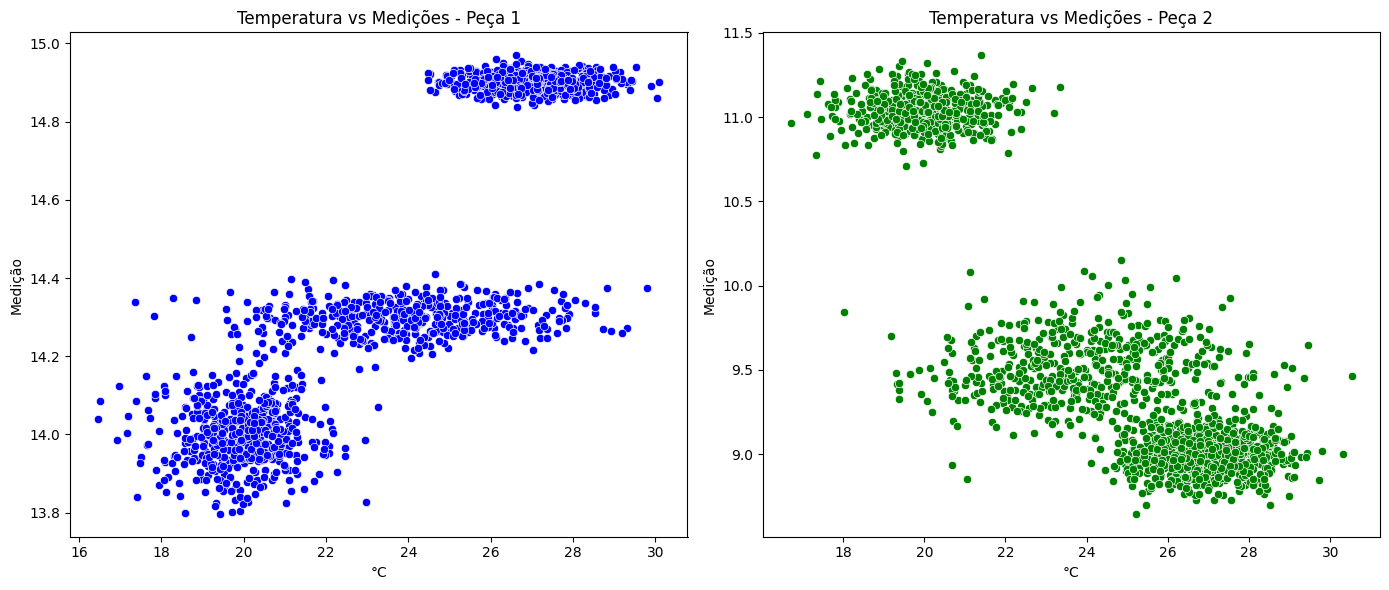

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="Temperatura", y="Medicao", data=df2[df2["peça"] == "peca1"], color="blue")
plt.title("Temperatura vs Medições - Peça 1")
plt.xlabel("°C")
plt.ylabel("Medição")

plt.subplot(1, 2, 2)
sns.scatterplot(x="Temperatura", y="Medicao", data=df2[df2["peça"] == "peca2"], color="green")
plt.title("Temperatura vs Medições - Peça 2")
plt.xlabel("°C")
plt.ylabel("Medição")

plt.tight_layout()
plt.show()


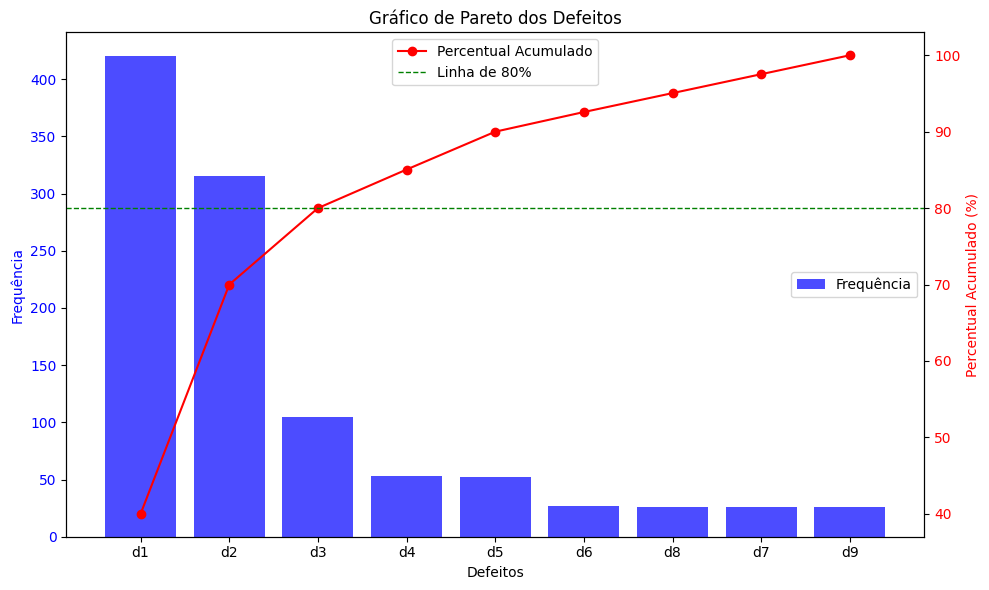

In [30]:
defeitos = df2[df2["Defeito?"] == 1]

freq_defeitos = defeitos["Nome defeito"].value_counts()

freq_defeitos_sorted = freq_defeitos.sort_values(ascending=False)

percent_acumulada = freq_defeitos_sorted.cumsum() / freq_defeitos_sorted.sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras (frequências)
bars = ax.bar(freq_defeitos_sorted.index, freq_defeitos_sorted, color='blue', alpha=0.7, label="Frequência")
ax.set_ylabel("Frequência", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_xlabel("Defeitos")
ax.set_title("Gráfico de Pareto dos Defeitos")

# Adicionando o segundo eixo (percentual acumulado)
ax2 = ax.twinx()
ax2.plot(freq_defeitos_sorted.index, percent_acumulada, color='red', marker='o', linestyle='-', label="Percentual Acumulado")
ax2.set_ylabel("Percentual Acumulado (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionando uma linha de referência para 80%
ax2.axhline(80, color='green', linestyle='--', linewidth=1, label="Linha de 80%")

fig.tight_layout()
ax.legend(loc="center right")
ax2.legend(loc="upper center")
plt.show()
